In [1]:
#подключение библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn import metrics
import copy
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
ds = pd.ExcelFile('Dataset.xlsx')
df = pd.read_excel(ds, header = 0, index_col=0)
df

,Діагноз,пол,возраст,ЧДД в минуту,АД сист,АД диаст,Пульс,эритроциты,Hb,цветовой показатель,...,билирубин 3,АСТ,АЛТ,глюкоза,сиаловые кислоты,серомукоиды,удельный вес,белок,лейк п/зр,эритр неизм п/зр
№иб,,,,,,,,,,,,,,,,,,,,,
1440,ХОЗЛ,0,79,22,155,100,92,4.44,142.0,0.95,...,12.0,28.0,26.0,NaN,150.0,0.17,1022.0,0.090,4.0,5.0
1484,ХОЗЛ,0,76,23,140,90,85,4.30,134.0,0.90,...,8.0,33.0,29.0,4.3,170.0,0.14,1018.0,0.000,2.0,0.0
1497,ХОЗЛ,1,72,26,140,90,150,4.00,121.0,0.90,...,7.0,61.0,39.0,5.5,NaN,NaN,1018.0,0.000,2.0,0.0
1530,ХОЗЛ,1,54,26,140,90,90,4.57,141.0,0.90,...,7.0,44.0,27.0,4.3,NaN,NaN,1015.0,0.000,2.0,0.0
1583,ХОЗЛ,0,81,27,150,100,102,4.00,155.0,1.00,...,10.0,39.0,19.0,5.8,NaN,NaN,1024.0,0.000,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868,Пневмонія,1,84,22,135,80,100,3.29,98.0,0.89,...,NaN,NaN,NaN,5.2,NaN,NaN,1016.0,0.033,6.0,0.0
5033,Пневмонія,0,67,24,160,90,70,4.10,131.0,0.95,...,NaN,NaN,NaN,NaN,NaN,NaN,1014.0,0.000,10.0,0.0
5079,Пневмонія,1,26,22,115,75,86,4.30,135.0,0.94,...,NaN,NaN,NaN,NaN,NaN,NaN,1015.0,0.075,2.0,0.0


In [3]:
#удалить столбцы с больше,чем 20% нулевых значений
dp= df.dropna(axis = 1, thresh=int(0.8*len(df)))
dp

,Діагноз,пол,возраст,ЧДД в минуту,АД сист,АД диаст,Пульс,эритроциты,Hb,цветовой показатель,лейкоциты,эозинофилы,палочкоядерные,сегментоядерные,лимфоциты,Моноциты,СОЭ,белок,лейк п/зр,эритр неизм п/зр
№иб,,,,,,,,,,,,,,,,,,,,
1440,ХОЗЛ,0,79,22,155,100,92,4.44,142.0,0.95,11.6,1.0,12.0,75.0,8.0,4.0,11.0,0.090,4.0,5.0
1484,ХОЗЛ,0,76,23,140,90,85,4.30,134.0,0.90,7.5,1.0,8.0,57.0,26.0,3.0,21.0,0.000,2.0,0.0
1497,ХОЗЛ,1,72,26,140,90,150,4.00,121.0,0.90,5.0,1.0,4.0,56.0,36.0,3.0,28.0,0.000,2.0,0.0
1530,ХОЗЛ,1,54,26,140,90,90,4.57,141.0,0.90,6.5,2.0,1.0,62.0,32.0,3.0,19.0,0.000,2.0,0.0
1583,ХОЗЛ,0,81,27,150,100,102,4.00,155.0,1.00,8.8,1.0,2.0,78.0,12.0,6.0,9.0,0.000,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868,Пневмонія,1,84,22,135,80,100,3.29,98.0,0.89,7.7,1.0,4.0,72.0,18.0,7.0,30.0,0.033,6.0,0.0
5033,Пневмонія,0,67,24,160,90,70,4.10,131.0,0.95,16.5,1.0,5.0,76.0,14.0,3.0,31.0,0.000,10.0,0.0
5079,Пневмонія,1,26,22,115,75,86,4.30,135.0,0.94,6.9,1.0,7.0,54.0,34.0,4.0,13.0,0.075,2.0,0.0


In [4]:
dd = dp.rename(columns = {"Діагноз": "target"})

In [5]:
dd_fill = dd.fillna(dd.mean())

In [6]:
features = dd_fill.columns.values.tolist()[1:]
features

['пол',
 'возраст',
 'ЧДД в минуту',
 'АД сист',
 'АД диаст',
 'Пульс',
 'эритроциты',
 'Hb',
 'цветовой показатель',
 'лейкоциты',
 'эозинофилы',
 'палочкоядерные',
 'сегментоядерные',
 'лимфоциты',
 'Моноциты',
 'СОЭ',
 'белок',
 'лейк п/зр',
 'эритр неизм п/зр']

In [7]:
x = dd_fill.loc[:,features].values
x

array([[0.0e+00, 7.9e+01, 2.2e+01, ..., 9.0e-02, 4.0e+00, 5.0e+00],
       [0.0e+00, 7.6e+01, 2.3e+01, ..., 0.0e+00, 2.0e+00, 0.0e+00],
       [1.0e+00, 7.2e+01, 2.6e+01, ..., 0.0e+00, 2.0e+00, 0.0e+00],
       ...,
       [1.0e+00, 2.6e+01, 2.2e+01, ..., 7.5e-02, 2.0e+00, 0.0e+00],
       [0.0e+00, 8.2e+01, 2.4e+01, ..., 3.0e-02, 5.0e+00, 7.0e+00],
       [1.0e+00, 3.5e+01, 2.2e+01, ..., 0.0e+00, 6.0e+00, 0.0e+00]])

In [8]:
y = dd_fill.loc[:,'target'].values
print(y)

['ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ'
 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ'
 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ'
 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ'
 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'ХОЗЛ' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА'
 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА'
 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА'
 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА' 'БА'
 'БА' 'БА' 'БА' 'БА' 'БА' 'Пневмонія' 'Пневмонія' 'Пневмонія' 'Пневмонія'
 'Пневмонія' 'Пневмонія' 'Пневмонія' 'Пневмонія' 'Пневмонія' 'Пневмонія'
 'Пневмонія' 'Пневмонія' 'Пневмонія' 'Пневмонія' 'Пневмонія' 'Пневмонія'
 'Пневмонія' 'Пневмонія' 'Пневмонія' 'Пневмонія' 'Пневмонія' 'Пневмонія'
 'Пневмонія' 'Пневмонія' 'Пневмонія' 'Пневмонія' 'Пневмонія' 'Пневмонія'
 'Пневмонія' 'Пневмонія' 'Пневмонія' 'Пневмонія' 'Пневмонія']


In [9]:
scaler = MinMaxScaler().fit_transform(x)
print(scaler[:10,:])

[[0.         0.85915493 0.38888889 0.79166667 0.85714286 0.38297872
  0.24223602 0.5952381  0.60526316 0.18727915 0.         0.16176471
  0.85714286 0.07575758 0.11111111 0.125      1.         0.1
  0.625     ]
 [0.         0.81690141 0.44444444 0.66666667 0.71428571 0.30851064
  0.21325052 0.5        0.47368421 0.11484099 0.         0.10294118
  0.64285714 0.34848485 0.05555556 0.26388889 0.         0.05
  0.        ]
 [1.         0.76056338 0.61111111 0.66666667 0.71428571 1.
  0.15113872 0.3452381  0.47368421 0.07067138 0.         0.04411765
  0.63095238 0.5        0.05555556 0.36111111 0.         0.05
  0.        ]
 [1.         0.50704225 0.61111111 0.66666667 0.71428571 0.36170213
  0.26915114 0.58333333 0.47368421 0.09717314 0.16666667 0.
  0.70238095 0.43939394 0.05555556 0.23611111 0.         0.05
  0.        ]
 [0.         0.88732394 0.66666667 0.75       0.85714286 0.4893617
  0.15113872 0.75       0.73684211 0.13780919 0.         0.01470588
  0.89285714 0.13636364 0.22222222

In [10]:
scaler.shape

(132, 19)

In [11]:
x_ = StandardScaler().fit_transform(x)
print(x_[:2,:])


[[-0.89901011  1.61826478 -0.38837368  1.47966207  1.921851    0.30042152
   0.09099696  0.31843575  0.47565787  0.65691907 -0.46100148  0.62234291
   0.94327065 -1.70777768 -0.22090137 -0.40158005  4.94688553 -0.08531714
   3.60959333]
 [-0.89901011  1.43326684 -0.09031946  0.47460859  0.80675504 -0.18915429
  -0.2036907  -0.22005723 -0.53803923 -0.16712862 -0.46100148  0.22083136
  -0.46621423  0.17101864 -0.63114678  0.37068928 -0.32102752 -0.54745165
  -0.29429297]]


In [12]:
x_.shape

(132, 19)

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(scaler)

In [14]:
print(y_kmeans)

[2 2 1 1 2 0 1 0 1 1 2 0 2 2 2 0 2 0 2 0 0 0 0 1 1 0 0 2 2 2 2 2 0 0 2 1 2
 1 1 0 2 0 0 1 0 2 0 0 1 1 1 1 1 1 1 1 2 1 0 0 1 0 1 1 2 0 1 1 1 0 1 1 1 1
 1 1 1 1 2 1 0 1 1 1 1 0 0 1 1 0 2 1 1 0 0 1 0 2 1 1 2 1 0 0 2 0 1 0 0 1 2
 2 0 1 2 1 1 2 1 2 1 1 2 1 2 2 2 1 2 1 2 1]


In [15]:
from sklearn import metrics
import copy
y_k = copy.copy(y)
y_k[y =='ХОЗЛ'] = 0
y_k[y =='БА'] = 1
y_k[y =='Пневмонія'] = 2

# make predictions
expected = list(y_k)
predicted = list(y_kmeans)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))


              precision    recall  f1-score   support

           0       0.46      0.37      0.41        46
           1       0.58      0.64      0.61        53
           2       0.36      0.39      0.38        33

    accuracy                           0.48       132
   macro avg       0.47      0.47      0.46       132
weighted avg       0.48      0.48      0.48       132

[[17 11 18]
 [14 34  5]
 [ 6 14 13]]


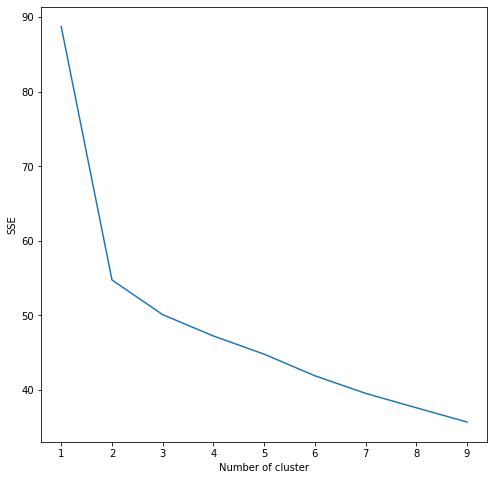

In [16]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(scaler)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure(figsize = (8, 8))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(scaler)
Z=pca.transform(scaler)

In [18]:
Comp = pd.DataFrame(data = Z [:, 0:3], columns = ['Component 1', 'Component 2','Component 3',])
Comp
final = pd.concat([Comp, dd[['target']].reset_index(drop=True)], axis = 1)
final

,Component 1,Component 2,Component 3,target
0,-0.552343,0.577372,-0.278418,ХОЗЛ
1,-0.452827,0.260535,-0.079334,ХОЗЛ
2,0.553551,0.248772,-0.538920,ХОЗЛ
3,0.526222,-0.121241,-0.242229,ХОЗЛ
4,-0.566669,0.108482,-0.435113,ХОЗЛ
...,...,...,...,...
127,0.568413,0.689854,-0.164036,Пневмонія
128,-0.469496,0.281457,0.006738,Пневмонія
129,0.603634,-0.083124,0.229315,Пневмонія
130,-0.487942,0.523576,-0.226538,Пневмонія


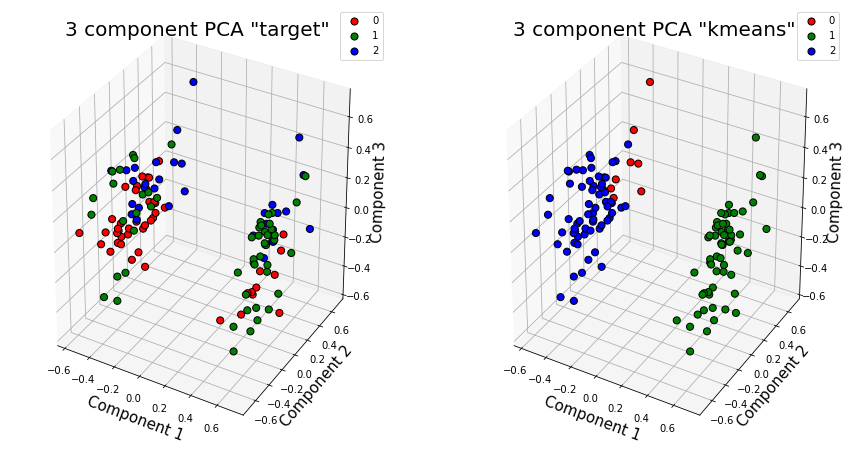

In [63]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.axes3d import get_test_data

fig = plt.figure(figsize = (15,8))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_zlabel('Component 3', fontsize = 15)
ax.set_title('3 component PCA "target"', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = y_k ==  target
    ax.scatter(final.loc[indicesToKeep, 'Component 1'],
               final.loc[indicesToKeep, 'Component 2'],
               final.loc[indicesToKeep, 'Component 3'],
               c = color, alpha = 1, edgecolor='k',
               s = 50)
ax.legend(targets)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_zlabel('Component 3', fontsize = 15)
ax.set_title('3 component PCA "kmeans"', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = y_kmeans ==  target
    ax.scatter(final.loc[indicesToKeep, 'Component 1'],
               final.loc[indicesToKeep, 'Component 2'],
               final.loc[indicesToKeep, 'Component 3'],
               c = color, alpha = 1, edgecolor='k',
               s = 50)
ax.legend(targets)
plt.show()

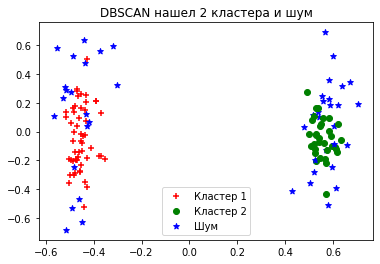

In [20]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

dbscan = DBSCAN()
dbscan.fit(scaler)

pca = PCA(n_components=3).fit(scaler)
pca_2d = pca.transform(scaler)

# Строим в соответствии с тремя классами
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Кластер 1', 'Кластер 2', 'Шум'])
plt.title('DBSCAN нашел 2 кластера и шум')
plt.show()

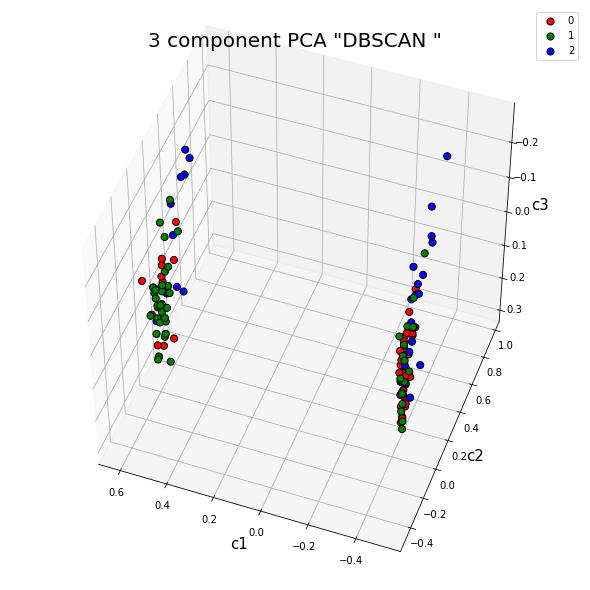

In [85]:
fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig, elev=-132, azim=70)
ax.set_xlabel('c1', fontsize = 15)
ax.set_ylabel('c2', fontsize = 15)
ax.set_zlabel('c3', fontsize = 15)
ax.set_title('3 component PCA "DBSCAN "', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = y_k ==  target
    ax.scatter(Comp.loc[indicesToKeep, 'c1'],
               Comp.loc[indicesToKeep, 'c2'],
               Comp.loc[indicesToKeep, 'c3'],
               c = color, alpha = 1, edgecolor='k',
               s = 50)
ax.legend(targets)
ax.grid()

In [86]:
dbscan.labels_

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],
      dtype=int64)

In [87]:
x_data= SelectKBest(f_classif, k=3).fit_transform(scaler, y)
x_data

array([[0.        , 0.5952381 , 0.125     ],
       [0.        , 0.5       , 0.26388889],
       [1.        , 0.3452381 , 0.36111111],
       [1.        , 0.58333333, 0.23611111],
       [0.        , 0.75      , 0.09722222],
       [0.        , 0.78571429, 0.02777778],
       [1.        , 0.17857143, 0.19444444],
       [0.        , 0.45238095, 0.16666667],
       [1.        , 0.53571429, 0.20833333],
       [1.        , 0.94047619, 0.02777778],
       [0.        , 0.70238095, 0.09722222],
       [0.        , 0.80952381, 0.125     ],
       [0.        , 0.41666667, 0.08333333],
       [0.        , 0.52380952, 0.06944444],
       [0.        , 0.4047619 , 0.09722222],
       [0.        , 0.66666667, 0.01388889],
       [0.        , 0.51190476, 0.26388889],
       [0.        , 0.47619048, 0.02777778],
       [0.        , 0.55952381, 0.18055556],
       [0.        , 0.80952381, 0.11111111],
       [0.        , 0.70238095, 0.09722222],
       [0.        , 0.77380952, 0.11111111],
       [0.

In [88]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x_data)
y_kmeans

array([2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1,
       0, 0, 2, 1, 2, 1, 1, 0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 1, 0, 1, 2, 1])

In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(x_data)
z=pca.transform(x_data)

In [97]:
comp = pd.DataFrame(data = z [:, 0:3], columns = ['Component 1', 'Component 2','Component 3',])
comp
finale = pd.concat([comp, dd[['target']].reset_index(drop=True)], axis = 1)
finale

,Component 1,Component 2,Component 3,target
0,-0.453522,-0.039933,0.029887,ХОЗЛ
1,-0.435665,0.126019,0.007494,ХОЗЛ
2,0.579085,0.186682,0.005024,ХОЗЛ
3,0.545525,-0.063481,-0.087748,ХОЗЛ
4,-0.472669,-0.162904,-0.066209,ХОЗЛ
...,...,...,...,...
127,0.611895,0.388407,0.189343,Пневмонія
128,-0.424640,0.252594,-0.059011,Пневмонія
129,0.549567,-0.077998,0.020969,Пневмонія
130,-0.450021,0.036970,-0.071432,Пневмонія


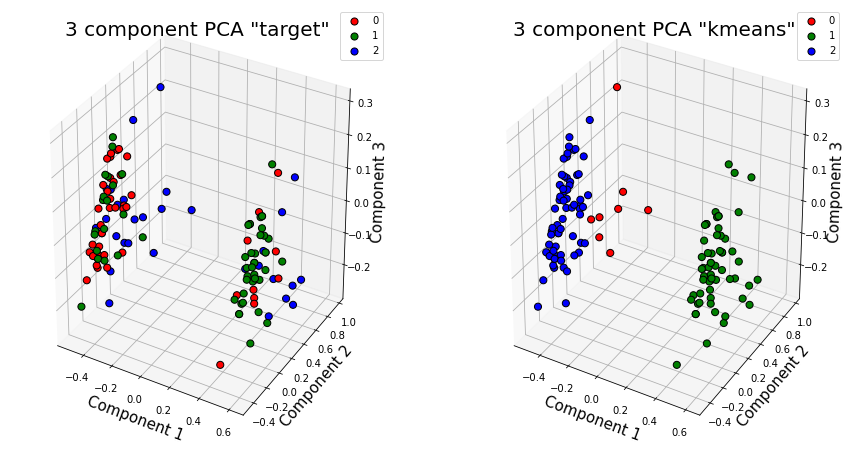

In [98]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.axes3d import get_test_data

fig = plt.figure(figsize = (15,8))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_zlabel('Component 3', fontsize = 15)
ax.set_title('3 component PCA "target"', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = y_k ==  target
    ax.scatter(finale.loc[indicesToKeep, 'Component 1'],
               finale.loc[indicesToKeep, 'Component 2'],
               finale.loc[indicesToKeep, 'Component 3'],
               c = color, alpha = 1, edgecolor='k',
               s = 50)
ax.legend(targets)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_zlabel('Component 3', fontsize = 15)
ax.set_title('3 component PCA "kmeans"', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = y_kmeans ==  target
    ax.scatter(finale.loc[indicesToKeep, 'Component 1'],
               finale.loc[indicesToKeep, 'Component 2'],
               finale.loc[indicesToKeep, 'Component 3'],
               c = color, alpha = 1, edgecolor='k',
               s = 50)
ax.legend(targets)
plt.show()

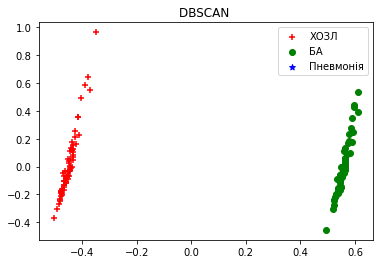

In [99]:
dbscan = DBSCAN()

# Обучаем
dbscan.fit(x_data)

# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=3).fit(x_data)
pca_2d = pca.transform(x_data)

# Строим в соответствии с тремя классами
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['ХОЗЛ', 'БА', 'Пневмонія'])
plt.title('DBSCAN ')
plt.show()

In [100]:
Comp = pd.DataFrame(data = z [:, 0:3], columns = ['c1', 'c2','c3',])
Comp

,c1,c2,c3
0,-0.453522,-0.039933,0.029887
1,-0.435665,0.126019,0.007494
2,0.579085,0.186682,0.005024
3,0.545525,-0.063481,-0.087748
4,-0.472669,-0.162904,-0.066209
...,...,...,...
127,0.611895,0.388407,0.189343
128,-0.424640,0.252594,-0.059011
129,0.549567,-0.077998,0.020969
130,-0.450021,0.036970,-0.071432


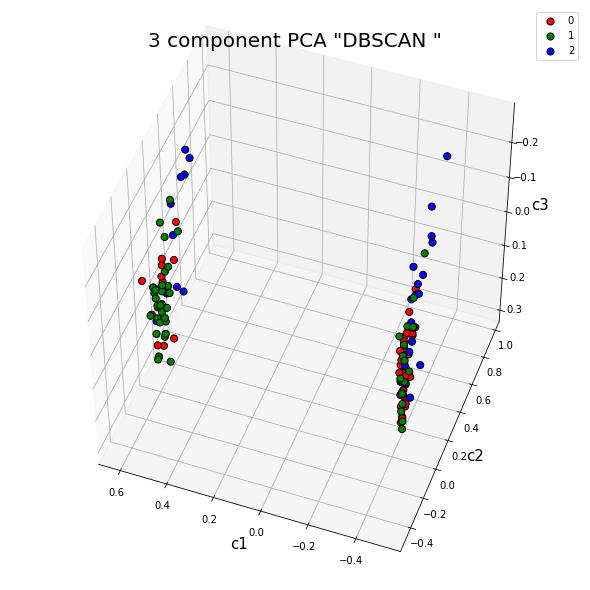

In [101]:
fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig, elev=-132, azim=70)
ax.set_xlabel('c1', fontsize = 15)
ax.set_ylabel('c2', fontsize = 15)
ax.set_zlabel('c3', fontsize = 15)
ax.set_title('3 component PCA "DBSCAN "', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = y_k ==  target
    ax.scatter(Comp.loc[indicesToKeep, 'c1'],
               Comp.loc[indicesToKeep, 'c2'],
               Comp.loc[indicesToKeep, 'c3'],
               c = color, alpha = 1, edgecolor='k',
               s = 50)
ax.legend(targets)
ax.grid()

In [102]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering, DBSCAN

data = dd_fill
X = scaler
y = y_k

algorithms = []
algorithms.append(KMeans(n_clusters=3, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=3, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=3))
algorithms.append(DBSCAN())

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative', 'DBSCAN'])

results

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.085666,0.070535,0.083567,0.084311,0.083938,0.232403
Affinity,0.076504,0.130069,0.258662,0.133422,0.176040,0.111954
Spectral,0.085666,0.070535,0.083567,0.084311,0.083938,0.232403
Agglomerative,0.085666,0.070535,0.083567,0.084311,0.083938,0.230224
DBSCAN,0.050808,0.043143,0.056875,0.056875,0.056875,0.200441
